In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
# generators:divides the dATA into batches. Useful to process large amount of data
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/train",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/validation_ds",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2000 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)#map function sends each image to process function
validation_ds = validation_ds.map(process)

In [6]:
# create CNN model # 3 convlayers with 32,64,128 filters

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#3 fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
63/63 [==============================] - 18s 163ms/step - loss: 5.5168 - accuracy: 0.5555 - val_loss: 2.9968 - val_accuracy: 0.5475
Epoch 2/10
63/63 [==============================] - 7s 113ms/step - loss: 2.6881 - accuracy: 0.5810 - val_loss: 12.6925 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 8s 113ms/step - loss: 1.3438 - accuracy: 0.5685 - val_loss: 2.3618 - val_accuracy: 0.5025
Epoch 4/10
63/63 [==============================] - 8s 114ms/step - loss: 0.9461 - accuracy: 0.5790 - val_loss: 1.6451 - val_accuracy: 0.5300
Epoch 5/10
63/63 [==============================] - 7s 113ms/step - loss: 0.7574 - accuracy: 0.6245 - val_loss: 0.9761 - val_accuracy: 0.5475
Epoch 6/10
63/63 [==============================] - 8s 114ms/step - loss: 0.6908 - accuracy: 0.6450 - val_loss: 0.9360 - val_accuracy: 0.5300
Epoch 7/10
63/63 [==============================] - 8s 113ms/step - loss: 0.5885 - accuracy: 0.6990 - val_loss: 1.1177 - val_accuracy: 0.5050
Epoc

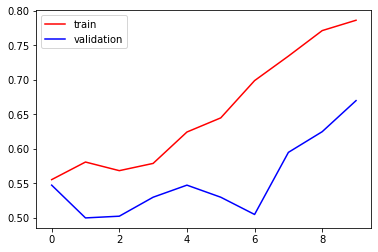

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

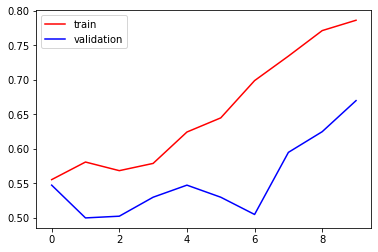

In [11]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

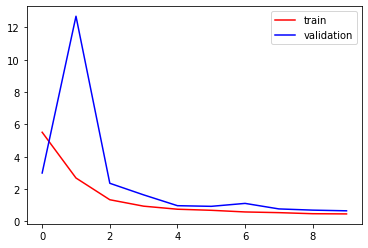

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

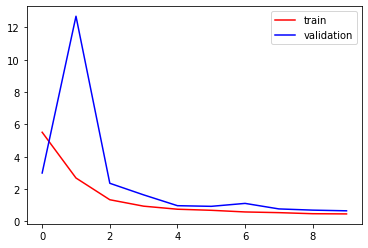

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity